In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [2]:
def printHeader(x):
   print("**************************************************************************************************************")
   print(x)
   print("**************************************************************************************************************")
   print('\n')

In [3]:
import os
#os.getcwd()
os.chdir('/home/bfrison/pet_finder')

In [4]:
df = pd.read_csv('train.csv', dtype={'AdoptionSpeed':'O'})
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [6]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000


In [7]:
df_color_labels = pd.read_csv('color_labels.csv')
color_labels_dict = dict()
color_labels_dict.update(zip(df_color_labels['ColorID'], df_color_labels['ColorName']))
df['Color1_labelled'] = df['Color1'].map(color_labels_dict)
df['Color2_labelled'] = df['Color2'].map(color_labels_dict)
df['Color3_labelled'] = df['Color3'].map(color_labels_dict)

df_breeds_labels = pd.read_csv('breed_labels.csv')
breed_labels_dict = dict()
breed_labels_dict.update(zip(df_breeds_labels['BreedID'], df_breeds_labels['BreedName']))
df['Breed1_labelled'] = df['Breed1'].map(breed_labels_dict)
df['Breed2_labelled'] = df['Breed2'].map(breed_labels_dict)

In [8]:
print(df['AdoptionSpeed'].describe())


count     14993
unique        5
top           4
freq       4197
Name: AdoptionSpeed, dtype: object


In [9]:
df.dtypes
# list(set(df.dtypes.tolist()))

Type                 int64
Name                object
Age                  int64
Breed1               int64
Breed2               int64
Gender               int64
Color1               int64
Color2               int64
Color3               int64
MaturitySize         int64
FurLength            int64
Vaccinated           int64
Dewormed             int64
Sterilized           int64
Health               int64
Quantity             int64
Fee                  int64
State                int64
RescuerID           object
VideoAmt             int64
Description         object
PetID               object
PhotoAmt           float64
AdoptionSpeed       object
Color1_labelled     object
Color2_labelled     object
Color3_labelled     object
Breed1_labelled     object
Breed2_labelled     object
dtype: object

In [10]:
df_dogs = df[df['Type'] == 1]
df_cats = df[df['Type'] == 2]
df_adopt = []
for i in range(5):
    df_adopt.append(df[df['AdoptionSpeed'] == str(i)])
df_dogs_adopt = []
for i in range(5):
    df_dogs_adopt.append(df_dogs[df_dogs['AdoptionSpeed'] == str(i)])
df_cats_adopt = []
for i in range(5):
    df_cats_adopt.append(df_cats[df_cats['AdoptionSpeed'] == str(i)])

**************************************************************************************************************
Few animals adopted in the first day
**************************************************************************************************************




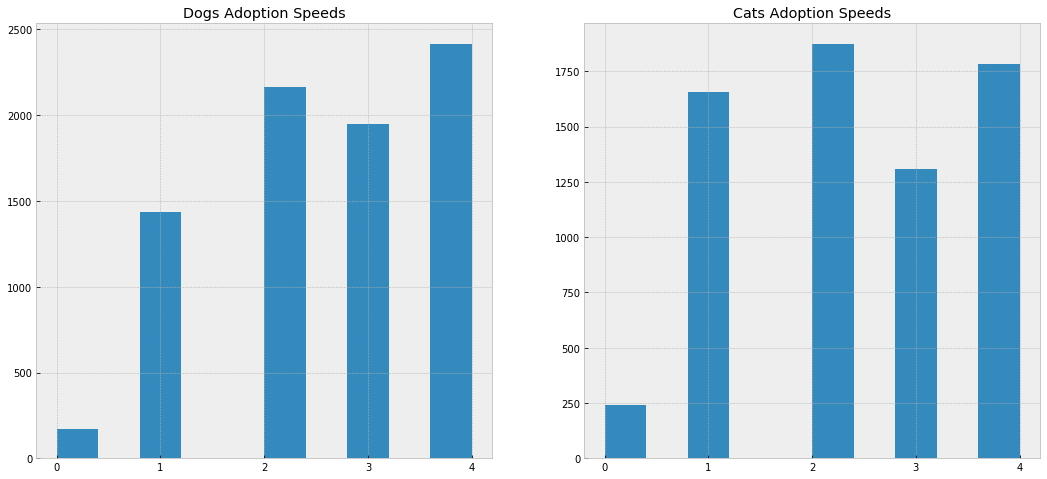

In [11]:
fig_hist, ax_hist = plt.subplots(1, 2, figsize=(18, 8))
ax_hist_dogs = ax_hist[0]
df_dogs['AdoptionSpeed'].sort_values().hist(ax=ax_hist_dogs)
ax_hist_dogs.set_title('Dogs Adoption Speeds')
ax_hist_cats = ax_hist[1]
df_cats['AdoptionSpeed'].sort_values().hist(ax=ax_hist_cats)
ax_hist_cats.set_title('Cats Adoption Speeds')
printHeader('Few animals adopted in the first day')

**************************************************************************************************************
Cats are adopted faster than dogs
**************************************************************************************************************




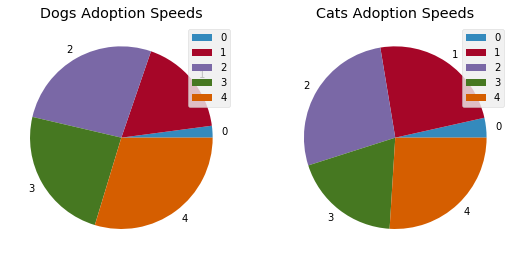

In [12]:
fig_pie, axes_pie = plt.subplots(1, 2, figsize=(9,16))
ax_pie_dogs = axes_pie[0]
ax_pie_dogs.pie(df_dogs['AdoptionSpeed'].value_counts().sort_index(), 
    labels=df_dogs['AdoptionSpeed'].value_counts().sort_index().index.tolist())
ax_pie_dogs.set_title('Dogs Adoption Speeds')
legend = ax_pie_dogs.legend()
ax_pie_cats = axes_pie[1]
ax_pie_cats.pie(df_cats['AdoptionSpeed'].value_counts().sort_index(), 
    labels=df_cats['AdoptionSpeed'].value_counts().sort_index().index.tolist())
ax_pie_cats.set_title('Cats Adoption Speeds')
legend = ax_pie_cats.legend()
printHeader('Cats are adopted faster than dogs')

**************************************************************************************************************
Young cats tend to be adopted faster than young dogs
**************************************************************************************************************




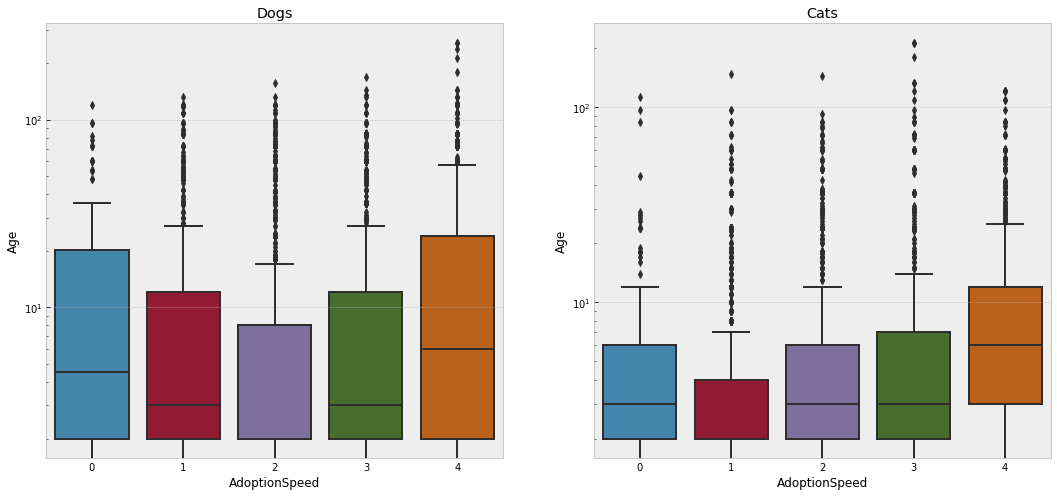

In [13]:
fig, ax_lst = plt.subplots(1, 2, figsize=(18,8))
ax1 = sns.boxplot(x='AdoptionSpeed', y='Age', ax=ax_lst[0], data=df_dogs)    
ax2 = sns.boxplot(x='AdoptionSpeed', y='Age', ax=ax_lst[1], data=df_cats)    
ax1.set(yscale='log', title='Dogs')    
ax2.set(yscale='log', title='Cats')
printHeader('Young cats tend to be adopted faster than young dogs')

In [14]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num_dogs = df_dogs.select_dtypes(include = ['float64', 'int64'])
df_num_cats = df_cats.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,0,1.0
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,0,2.0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,0,7.0
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,0,8.0
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,0,3.0


**************************************************************************************************************
Gold dogs win! Yellow dogs are less likely to get adopted.

**************************************************************************************************************




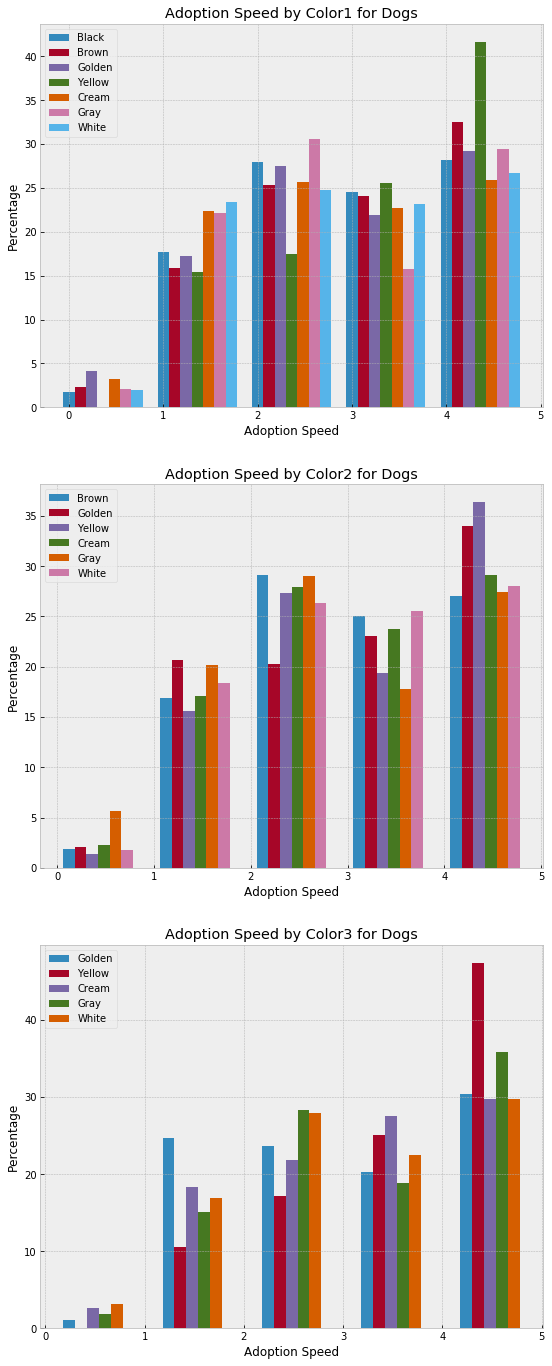

In [15]:
fig_color_dogs, axes_color_dogs = plt.subplots(3, 1, figsize=(9,24))
bar_width = 0.12
for i in range(len(axes_color_dogs)):
    ax = axes_color_dogs[i]
    for j in range(7):
        df_color = df_dogs[df_dogs[f'Color{i+1}'] == j + 1]
        if len(df_color):
            df_color_adopt = [df_color[df_color['AdoptionSpeed'] == str(k)] for k in range(5)]
            ax.bar(np.arange(len(df_color_adopt)) + j * bar_width, 
                [100 * len(speed)/len(df_color) for speed in df_color_adopt], 
                bar_width, label=f'{color_labels_dict[j+1]}')
    ax.set(xlabel='Adoption Speed', ylabel='Percentage')
    ax.legend()
    ax.set_title(f'Adoption Speed by Color{i+1} for Dogs')
printHeader('Gold dogs win! Yellow dogs are less likely to get adopted.\n')

**************************************************************************************************************
Black cats lose! People prefer cream, white and brown cats.

**************************************************************************************************************




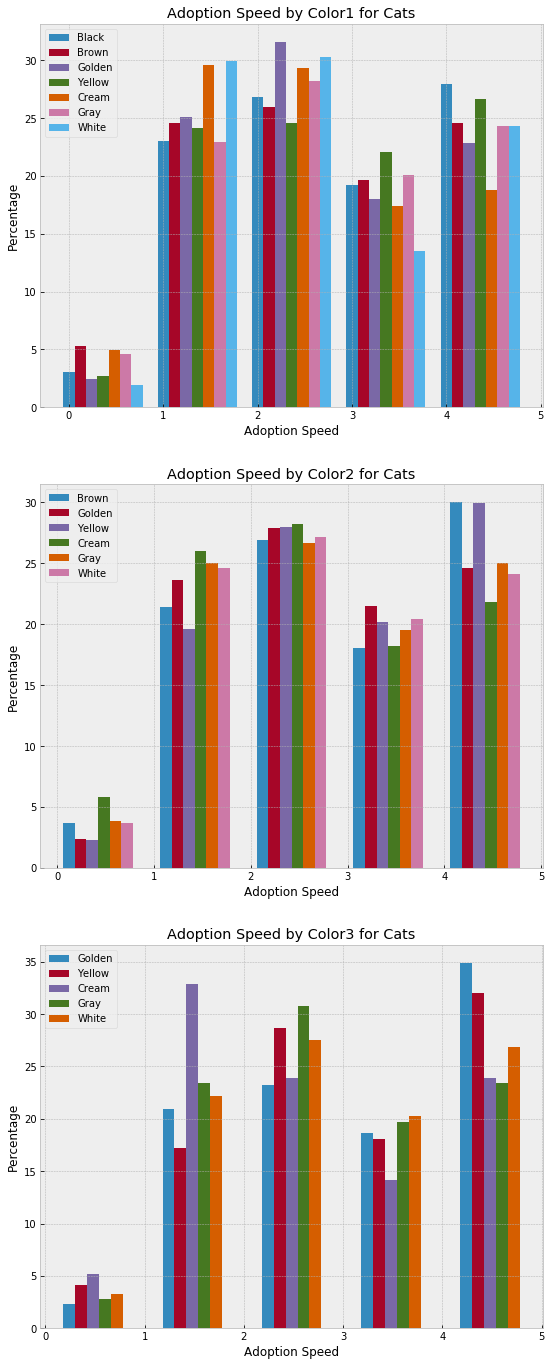

In [16]:
fig_color_cats, axes_color_cats = plt.subplots(3, 1, figsize=(9,24))
bar_width = 0.12
for i in range(len(axes_color_cats)):
    ax = axes_color_cats[i]
    for j in range(7):
        df_color = df_cats[df_cats[f'Color{i+1}'] == j + 1]
        if len(df_color):
            df_color_adopt = [df_color[df_color['AdoptionSpeed'] == str(k)] for k in range(5)]
            ax.bar(np.arange(len(df_color_adopt)) + j * bar_width, 
                [100 * len(speed)/len(df_color) for speed in df_color_adopt], 
                bar_width, label=f'{color_labels_dict[j+1]}')
    ax.set(xlabel='Adoption Speed', ylabel='Percentage')
    ax.legend()
    ax.set_title(f'Adoption Speed by Color{i+1} for Cats')
printHeader('Black cats lose! People prefer cream, white and brown cats.\n')

**************************************************************************************************************
Top dog breeds for adoption:  Golden Retriever, Labrador Retriever, Poodle, Shih Tzu.
Unpopular dog breeds:  Mixed breed, Terrier
**************************************************************************************************************




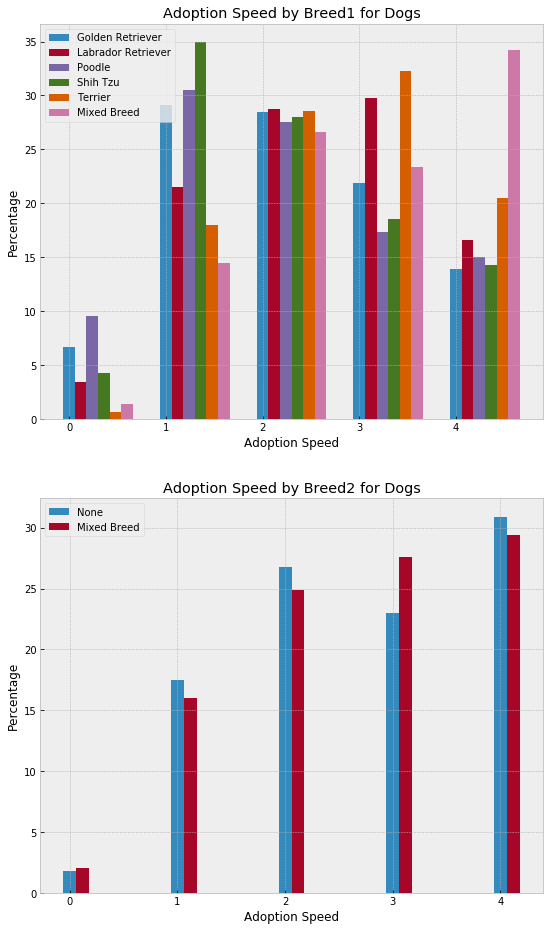

In [17]:
fig_breed_dogs, axes_breed_dogs = plt.subplots(2, 1, figsize=(9,16))
bar_width = 0.12
for i in range(len(axes_breed_dogs)):
    ax = axes_breed_dogs[i]
    df_breeds = [(breed_labels_dict.get(j, "None"), df_dogs[df_dogs[f'Breed{i+1}'] == j])
        for j in range(308) if len(df_dogs[df_dogs[f'Breed{i+1}'] == j]) > 100]
    for k, (breed_label, df_breed) in enumerate(df_breeds):
        df_breed_adopt = [df_breed[df_breed['AdoptionSpeed'] == str(l)] for l in range(5)]
        ax.bar(np.arange(len(df_breed_adopt)) + k * bar_width, 
            [100 * len(speed) / len(df_breed) for speed in df_breed_adopt],
            bar_width, label=f'{breed_label}')
    ax.set(xlabel='Adoption Speed', ylabel='Percentage')
    ax.set_title(f'Adoption Speed by Breed{i+1} for Dogs')
    ax.legend()
printHeader('Top dog breeds for adoption:  Golden Retriever, Labrador Retriever, Poodle, Shih Tzu.\nUnpopular dog breeds:  Mixed breed, Terrier')

**************************************************************************************************************
Top cat breeds for adoption:  Persian, Siamese, Domestic long hair.
Unpopular cat breeds:  Domestic short hair, Domestic medium hair, Calico, Tabby
**************************************************************************************************************




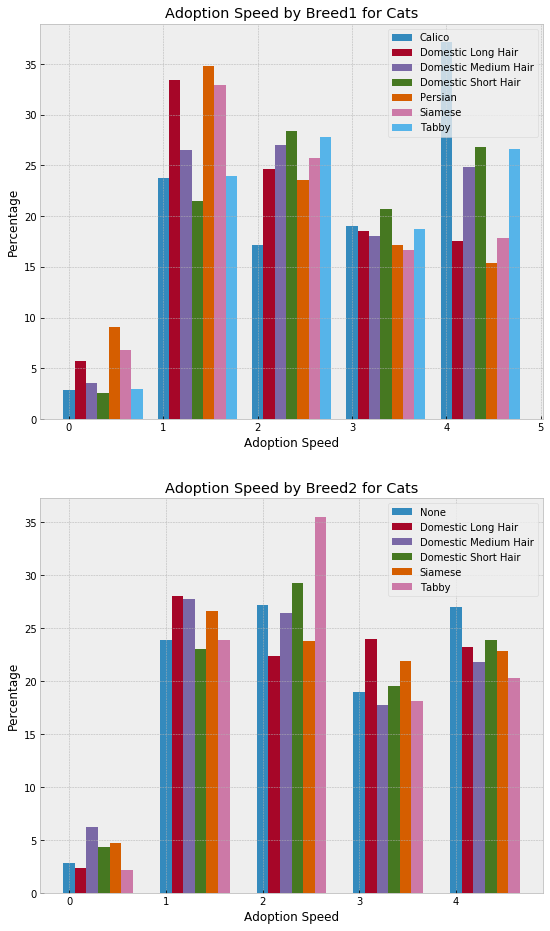

In [18]:
fig_breed_cats, axes_breed_cats = plt.subplots(2, 1, figsize=(9,16))
bar_width = 0.12
for i in range(len(axes_breed_cats)):
    ax = axes_breed_cats[i]
    df_breeds = [(breed_labels_dict.get(j, "None"), df_cats[df_cats[f'Breed{i+1}'] == j])
        for j in range(308) if len(df_cats[df_cats[f'Breed{i+1}'] == j]) > 100]
    for k, (breed_label, df_breed) in enumerate(df_breeds):
        df_breed_adopt = [df_breed[df_breed['AdoptionSpeed'] == str(l)] for l in range(5)]
        ax.bar(np.arange(len(df_breed_adopt)) + k * bar_width, 
            [100 * len(speed) / len(df_breed) for speed in df_breed_adopt],
            bar_width, label=f'{breed_label}')
    ax.set(xlabel='Adoption Speed', ylabel='Percentage')
    ax.set_title(f'Adoption Speed by Breed{i+1} for Cats')
    ax.legend()
printHeader('Top cat breeds for adoption:  Persian, Siamese, Domestic long hair.\nUnpopular cat breeds:  Domestic short hair, Domestic medium hair, Calico, Tabby')

**************************************************************************************************************
Among dogs, preference for not dewormed
**************************************************************************************************************




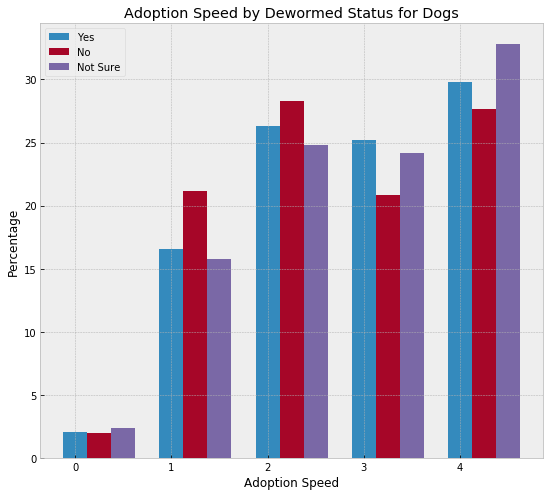

In [19]:
fig_dewormed_dogs = plt.figure(figsize=(9,8))
ax_dewormed_dogs = fig_dewormed_dogs.gca()
bar_width = 0.25
df_dewormed_list = [(['Yes', 'No', 'Not Sure'][j], df_dogs[df_dogs[f'Dewormed'] == j + 1]) for j in range(3)]
for k, (dewormed_label, df_dewormed) in enumerate(df_dewormed_list):
    df_dewormed_adopt = [df_dewormed[df_dewormed['AdoptionSpeed'] == str(l)] for l in range(5)]
    ax_dewormed_dogs.bar(np.arange(len(df_dewormed_adopt)) + k * bar_width, 
        [100 * len(speed) / len(df_dewormed) for speed in df_dewormed_adopt],
        bar_width, label=f'{dewormed_label}')
ax_dewormed_dogs.set(xlabel='Adoption Speed', ylabel='Percentage')
ax_dewormed_dogs.set_title(f'Adoption Speed by Dewormed Status for Dogs')
ax_dewormed_dogs.legend()
printHeader('Among dogs, preference for not dewormed')

**************************************************************************************************************
There is a tolerance for uncertainty about dewormed status, except that for some cats whose status is uncertain, adoption is very slow
**************************************************************************************************************




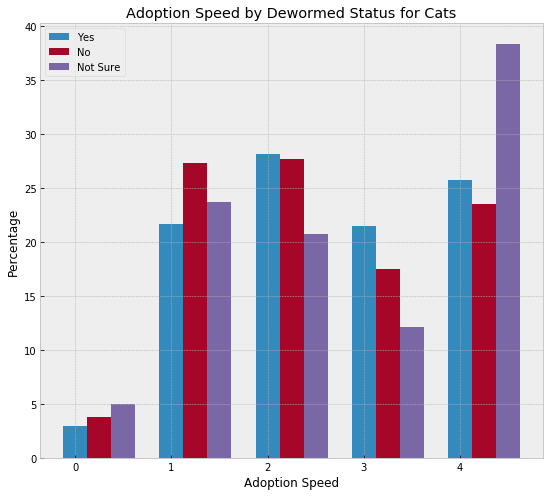

In [20]:
fig_dewormed_cats = plt.figure(figsize=(9,8))
ax_dewormed_cats = fig_dewormed_cats.gca()
bar_width = 0.25
df_dewormed_list = [(['Yes', 'No', 'Not Sure'][j], df_cats[df_cats[f'Dewormed'] == j + 1]) for j in range(3)]
for k, (dewormed_label, df_dewormed) in enumerate(df_dewormed_list):
    df_dewormed_adopt = [df_dewormed[df_dewormed['AdoptionSpeed'] == str(l)] for l in range(5)]
    ax_dewormed_cats.bar(np.arange(len(df_dewormed_adopt)) + k * bar_width, 
        [100 * len(speed) / len(df_dewormed) for speed in df_dewormed_adopt],
        bar_width, label=f'{dewormed_label}')
ax_dewormed_cats.set(xlabel='Adoption Speed', ylabel='Percentage')
ax_dewormed_cats.set_title(f'Adoption Speed by Dewormed Status for Cats')
ax_dewormed_cats.legend()
printHeader('There is a tolerance for uncertainty about dewormed status, except that for some cats whose status '
            'is uncertain, adoption is very slow')

**************************************************************************************************************
We can see a preference for dogs that are not sterilized
**************************************************************************************************************




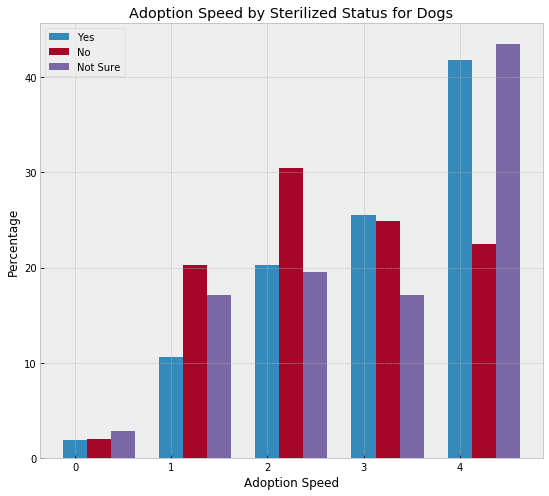

In [21]:
fig_sterilized_dogs = plt.figure(figsize=(9,8))
ax_sterilized_dogs = fig_sterilized_dogs.gca()
bar_width = 0.25
df_sterilized_list = [(['Yes', 'No', 'Not Sure'][j], df_dogs[df_dogs['Sterilized'] == j + 1]) for j in range(3)]
for k, (sterilized_label, df_sterilized) in enumerate(df_sterilized_list):
    df_sterilized_adopt = [df_sterilized[df_sterilized['AdoptionSpeed'] == str(l)] for l in range(5)]
    ax_sterilized_dogs.bar(np.arange(len(df_sterilized_adopt)) + k * bar_width, 
        [100 * len(speed) / len(df_sterilized) for speed in df_sterilized_adopt],
        bar_width, label=f'{sterilized_label}')
ax_sterilized_dogs.set(xlabel='Adoption Speed', ylabel='Percentage')
ax_sterilized_dogs.set_title(f'Adoption Speed by Sterilized Status for Dogs')
ax_sterilized_dogs.legend()
printHeader('We can see a preference for dogs that are not sterilized')

**************************************************************************************************************
We can see a preference for cats that are not sterilized
**************************************************************************************************************




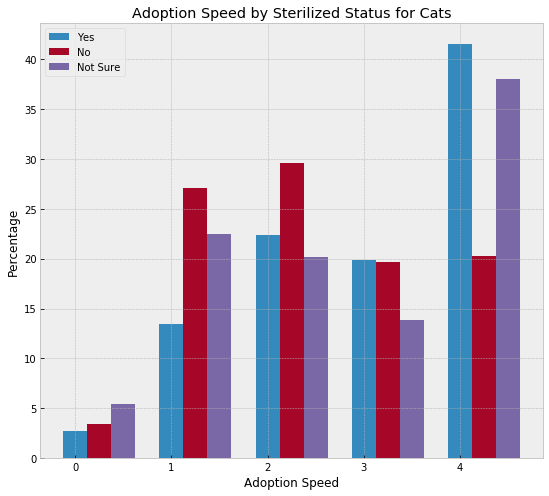

In [22]:
fig_sterilized_cats = plt.figure(figsize=(9,8))
ax_sterilized_cats = fig_sterilized_cats.gca()
bar_width = 0.25
df_sterilized_list = [(['Yes', 'No', 'Not Sure'][j], df_cats[df_cats['Sterilized'] == j + 1]) for j in range(3)]
for k, (sterilized_label, df_sterilized) in enumerate(df_sterilized_list):
    df_sterilized_adopt = [df_sterilized[df_sterilized['AdoptionSpeed'] == str(l)] for l in range(5)]
    ax_sterilized_cats.bar(np.arange(len(df_sterilized_adopt)) + k * bar_width, 
        [100 * len(speed) / len(df_sterilized) for speed in df_sterilized_adopt],
        bar_width, label=f'{sterilized_label}')
ax_sterilized_cats.set(xlabel='Adoption Speed', ylabel='Percentage')
ax_sterilized_cats.set_title(f'Adoption Speed by Sterilized Status for Cats')
ax_sterilized_cats.legend()
printHeader('We can see a preference for cats that are not sterilized')

**************************************************************************************************************
We can see a preference for dogs that are unvaccinated
**************************************************************************************************************




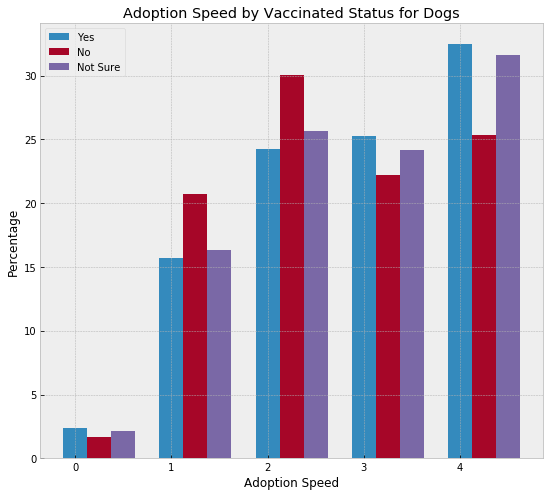

In [23]:
fig_vaccinated_dogs = plt.figure(figsize=(9,8))
ax_vaccinated_dogs = fig_vaccinated_dogs.gca()
bar_width = 0.25
df_vaccinated_list = [(['Yes', 'No', 'Not Sure'][j], df_dogs[df_dogs['Vaccinated'] == j + 1]) for j in range(3)]
for k, (vaccinated_label, df_vaccinated) in enumerate(df_vaccinated_list):
    df_vaccinated_adopt = [df_vaccinated[df_vaccinated['AdoptionSpeed'] == str(l)] for l in range(5)]
    ax_vaccinated_dogs.bar(np.arange(len(df_vaccinated_adopt)) + k * bar_width, 
        [100 * len(speed) / len(df_vaccinated) for speed in df_vaccinated_adopt],
        bar_width, label=f'{vaccinated_label}')
ax_vaccinated_dogs.set(xlabel='Adoption Speed', ylabel='Percentage')
ax_vaccinated_dogs.set_title(f'Adoption Speed by Vaccinated Status for Dogs')
ax_vaccinated_dogs.legend()
printHeader('We can see a preference for dogs that are unvaccinated')

**************************************************************************************************************
We can see a preference for cats that are unvaccinated
**************************************************************************************************************




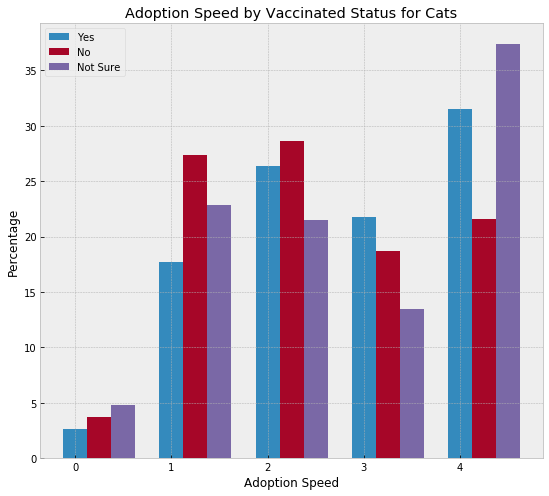

In [24]:
fig_vaccinated_cats = plt.figure(figsize=(9,8))
ax_vaccinated_cats = fig_vaccinated_cats.gca()
bar_width = 0.25
df_vaccinated_list = [(['Yes', 'No', 'Not Sure'][j], df_cats[df_cats['Vaccinated'] == j + 1]) for j in range(3)]
for k, (vaccinated_label, df_vaccinated) in enumerate(df_vaccinated_list):
    df_vaccinated_adopt = [df_vaccinated[df_vaccinated['AdoptionSpeed'] == str(l)] for l in range(5)]
    ax_vaccinated_cats.bar(np.arange(len(df_vaccinated_adopt)) + k * bar_width, 
        [100 * len(speed) / len(df_vaccinated) for speed in df_vaccinated_adopt],
        bar_width, label=f'{vaccinated_label}')
ax_vaccinated_cats.set(xlabel='Adoption Speed', ylabel='Percentage')
ax_vaccinated_cats.set_title(f'Adoption Speed by Vaccinated Status for Cats')
ax_vaccinated_cats.legend()
printHeader('We can see a preference for cats that are unvaccinated')

**************************************************************************************************************
Older dogs tend to be more vaccinated
**************************************************************************************************************




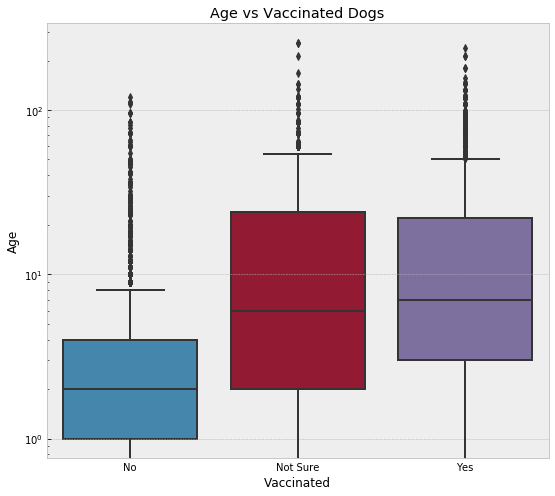

In [25]:
fig_age_vacc_dogs = plt.figure(figsize=(9, 8))

ax = fig_age_vacc_dogs.gca()
sns.boxplot(df['Vaccinated'].map({1:'Yes', 2:'No', 3:'Not Sure'}), df['Age'], ax=ax)
ax.set(xlabel='Vaccinated', ylabel='Age', yscale='log')
ax.set_title('Age vs Vaccinated Dogs')
printHeader('Older dogs tend to be more vaccinated')

**************************************************************************************************************
Older cats tend to be vaccinated
**************************************************************************************************************




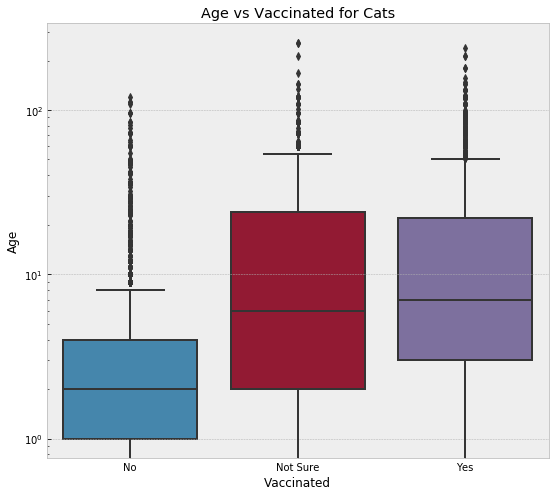

In [26]:
fig_age_vacc_cats = plt.figure(figsize=(9, 8))

ax = fig_age_vacc_cats.gca()
sns.boxplot(df['Vaccinated'].map({1:'Yes', 2:'No', 3:'Not Sure'}), df['Age'], ax=ax)
ax.set(xlabel='Vaccinated', ylabel='Age', yscale='log')
ax.set_title('Age vs Vaccinated for Cats')
printHeader('Older cats tend to be vaccinated')

**************************************************************************************************************
Older dogs are more likey to be dewormed. They are also much more likely to have an uncertain status. This may be due to the fact that they might have been dewormed when they were young and the data was lost
**************************************************************************************************************




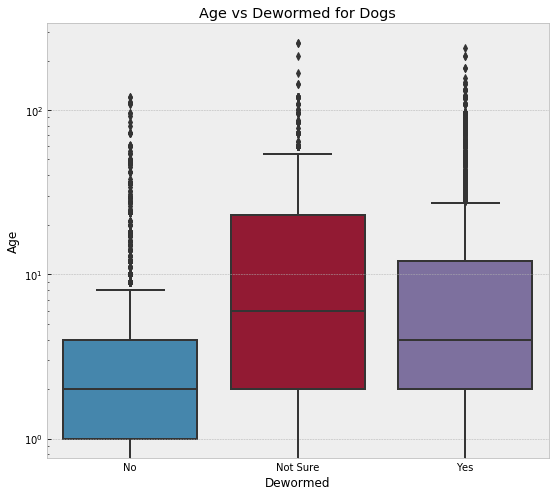

In [27]:
fig_age_deworm_dogs = plt.figure(figsize=(9, 8))

ax = fig_age_deworm_dogs.gca()
sns.boxplot(df['Dewormed'].map({1:'Yes', 2:'No', 3:'Not Sure'}), df['Age'], ax=ax)
ax.set(xlabel='Dewormed', ylabel='Age', yscale='log')
ax.set_title('Age vs Dewormed for Dogs')
printHeader('Older dogs are more likey to be dewormed. They are also much more likely to have an uncertain '
            'status. This may be due to the fact that they might have been dewormed when they were young and the '
            'data was lost')

**************************************************************************************************************
Older cats are more likey to be dewormed. They are also much more likely to have an uncertain status. This may be due to the fact that they might have been dewormed when they were young and the data was lost
**************************************************************************************************************




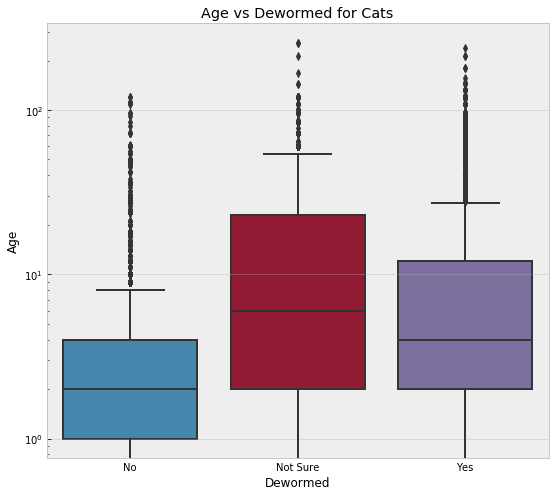

In [28]:
fig_age_deworm_cats = plt.figure(figsize=(9, 8))

ax = fig_age_deworm_cats.gca()
sns.boxplot(df['Dewormed'].map({1:'Yes', 2:'No', 3:'Not Sure'}), df['Age'], ax=ax)
ax.set(xlabel='Dewormed', ylabel='Age', yscale='log')
ax.set_title('Age vs Dewormed for Cats')
printHeader('Older cats are more likey to be dewormed. They are also much more likely to have an uncertain '
            'status. This may be due to the fact that they might have been dewormed when they were young and the '
            'data was lost')

**************************************************************************************************************
Older dogs are more likely to be sterilized
**************************************************************************************************************




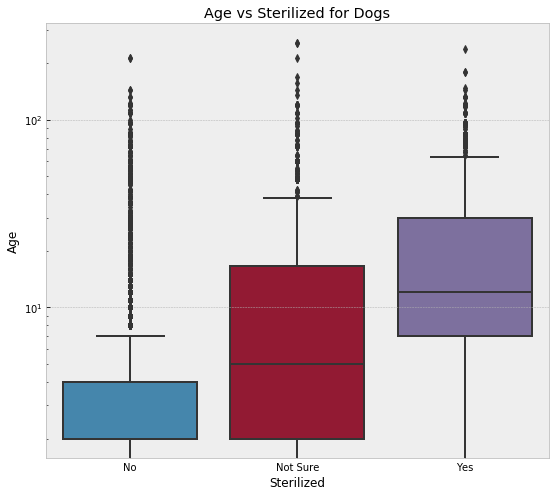

In [29]:
fig_age_steril_dogs = plt.figure(figsize=(9, 8))

ax = fig_age_steril_dogs.gca()
sns.boxplot(df['Sterilized'].map({1:'Yes', 2:'No', 3:'Not Sure'}), df['Age'], ax=ax)
ax.set(xlabel='Sterilized', ylabel='Age', yscale='log')
ax.set_title('Age vs Sterilized for Dogs')
printHeader('Older dogs are more likely to be sterilized')

**************************************************************************************************************
Older cats are more likely to be sterilized
**************************************************************************************************************




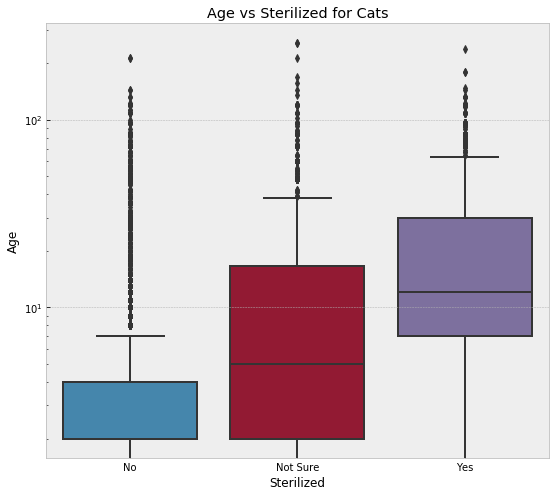

In [30]:
fig_age_steril_cats = plt.figure(figsize=(9, 8))

ax = fig_age_steril_cats.gca()
sns.boxplot(df['Sterilized'].map({1:'Yes', 2:'No', 3:'Not Sure'}), df['Age'], ax=ax)
ax.set(xlabel='Sterilized', ylabel='Age', yscale='log')
ax.set_title('Age vs Sterilized for Cats')
printHeader('Older cats are more likely to be sterilized')

**************************************************************************************************************
Sterilized dogs have higher fees
**************************************************************************************************************




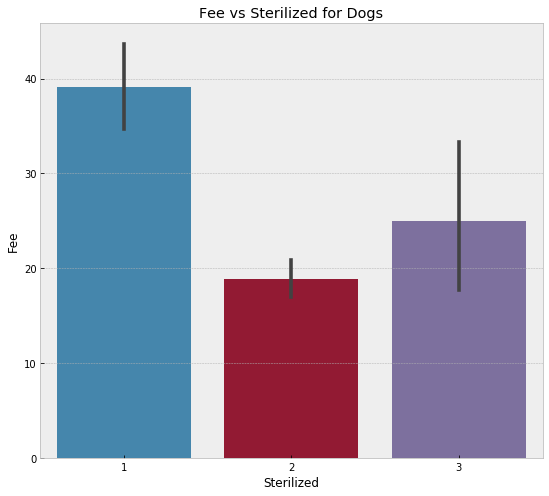

In [31]:
fig_fee_steril_dogs = plt.figure(figsize=(9, 8))

ax = fig_fee_steril_dogs.gca()
sns.barplot(x='Sterilized', y='Fee', data=df_dogs, ax=ax)
ax.set(xlabel='Sterilized', ylabel='Fee')
ax.set_title('Fee vs Sterilized for Dogs')
printHeader('Sterilized dogs have higher fees')

**************************************************************************************************************
Sterilized cats have higher fees
**************************************************************************************************************




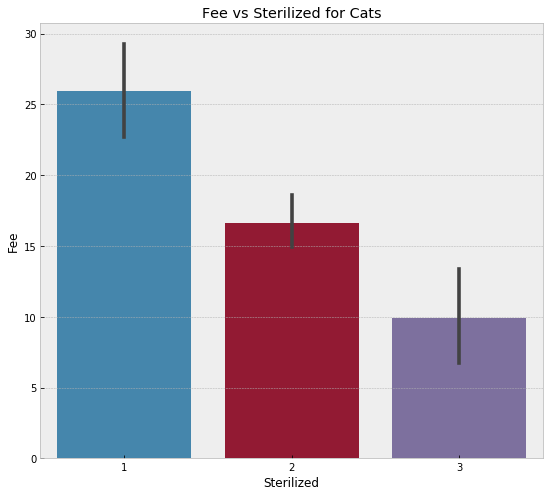

In [32]:
fig_fee_steril_cats = plt.figure(figsize=(9, 8))

ax = fig_fee_steril_cats.gca()
sns.barplot(x='Sterilized', y='Fee', data=df_cats, ax=ax)
ax.set(xlabel='Sterilized', ylabel='Fee')
ax.set_title('Fee vs Sterilized for Cats')
printHeader('Sterilized cats have higher fees')

**************************************************************************************************************
Vaccinated dogs have higher fees
**************************************************************************************************************




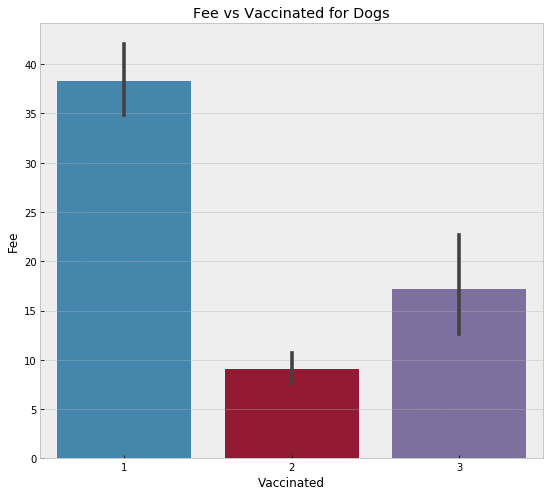

In [33]:
fig_fee_vacc_dogs = plt.figure(figsize=(9, 8))

ax = fig_fee_vacc_dogs.gca()
sns.barplot(x='Vaccinated', y='Fee', data=df_dogs, ax=ax)
ax.set(xlabel='Vaccinated', ylabel='Fee')
ax.set_title('Fee vs Vaccinated for Dogs')
printHeader('Vaccinated dogs have higher fees')

**************************************************************************************************************
Vaccinated cats have higher fees
**************************************************************************************************************




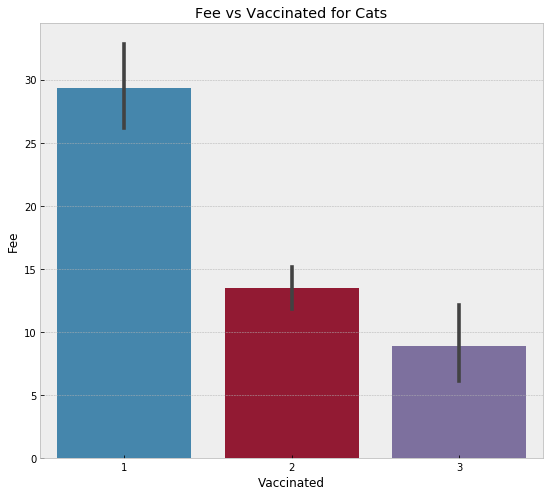

In [34]:
fig_fee_vacc_cats = plt.figure(figsize=(9, 8))

ax = fig_fee_vacc_cats.gca()
sns.barplot(x='Vaccinated', y='Fee', data=df_cats, ax=ax)
ax.set(xlabel='Vaccinated', ylabel='Fee')
ax.set_title('Fee vs Vaccinated for Cats')
printHeader('Vaccinated cats have higher fees')

**************************************************************************************************************
Dewormed dogs have higher fees
**************************************************************************************************************




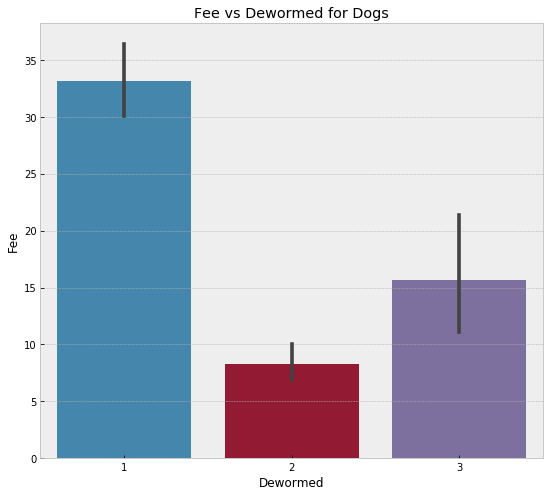

In [35]:
fig_fee_deworm_dogs = plt.figure(figsize=(9, 8))

ax = fig_fee_deworm_dogs.gca()
sns.barplot(x='Dewormed', y='Fee', data=df_dogs, ax=ax)
ax.set(xlabel='Dewormed', ylabel='Fee')
ax.set_title('Fee vs Dewormed for Dogs')
printHeader('Dewormed dogs have higher fees')

**************************************************************************************************************
Dewormed cats have higher fees
**************************************************************************************************************




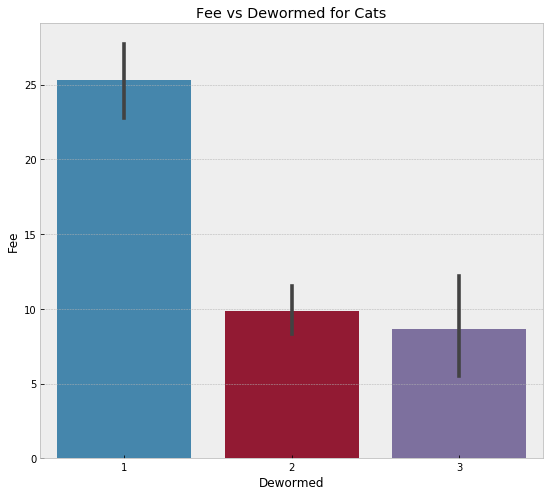

In [36]:
fig_fee_deworm_cats = plt.figure(figsize=(9, 8))

ax = fig_fee_deworm_cats.gca()
sns.barplot(x='Dewormed', y='Fee', data=df_cats, ax=ax)
ax.set(xlabel='Dewormed', ylabel='Fee')
ax.set_title('Fee vs Dewormed for Cats')
printHeader('Dewormed cats have higher fees')